In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

In [2]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.drop(['label'], axis=1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = np.array(train_df['label'])
x_train = np.array(train_df.drop(['label'], axis=1))

x_test = np.array(test_df)

In [6]:
y_train.shape

(42000,)

In [7]:
x_train.shape

(42000, 784)

In [8]:
x_test.shape

(28000, 784)

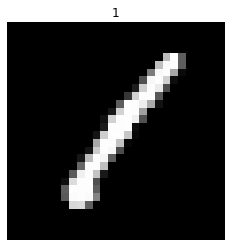

In [9]:
#0번 데이터에 대해서 그림그리고 정답 알아보기
data = x_train[0].reshape(28,28)
label = y_train[0]

plt.imshow(data, cmap='gray')
plt.axis(False) #라벨없애기
plt.title(label)
plt.show()

#for i in range(28):
#    for j in range(28):
#        print("%3d" %x_train[0][28*i+j], end="");
 #   print();

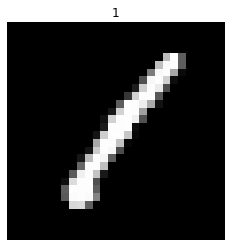

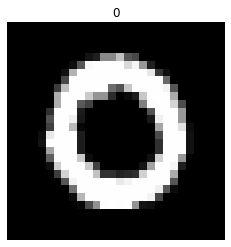

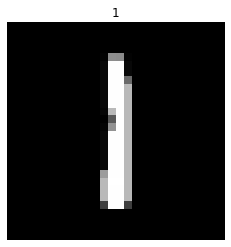

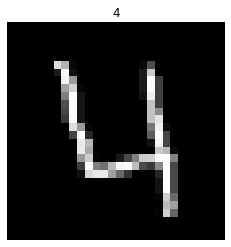

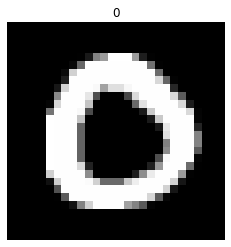

In [10]:
for index in range(5):
    
    
    data = x_train[index].reshape(28,28)
    label = y_train[index]

    plt.imshow(data, cmap='gray')
    plt.axis(False) #라벨없애기
    plt.title(label)
    plt.show()


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [11]:
random.sample(range(len(x_train)),k=rows*cols)

NameError: name 'rows' is not defined

In [12]:
list

list

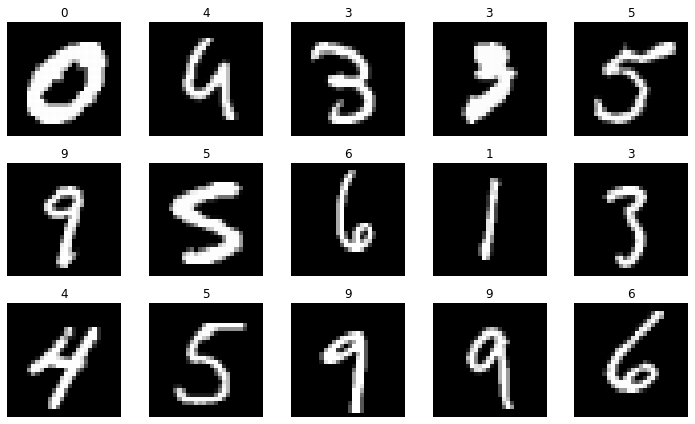

In [13]:
def plot_data(index):
    
    data = x_train[index].reshape(28,28)
    label = y_train[index]

    plt.imshow(data, cmap='gray')
    plt.axis(False) #라벨없애기
    plt.title(label)

rows, cols = 3, 5   
    
    
plt.figure(figsize=(10,6))  #도화지 사이즈
nums = random.sample(range(len(x_train)),k=rows*cols)
                     
for i, num in enumerate(nums) :
        plt.subplot(rows,cols,i+1)
        plot_data(num)
                     
# for i in range(rows*cols):
 #   plt.subplot(rows, cols, i+1)
  #  plot_data(i)
    
plt.tight_layout() #사진안겹치게
plt.show()
plt.close() # figure 선언하면 닫아줘야함

In [14]:
x_train.max() #numpy 행렬안의 최고값 최소는 min

255

In [15]:
#데이터가 0-1 사이가 좋다 ???
#데이터가 0~255까지 있기 때문에 => 전체 데이터 / 255 하기
x_train = x_train / 255
x_test = x_test / 255

In [16]:
x_train.max() #오호라

1.0

## MLP
Multi Layered Perceptron : 다층 퍼셉트론

In [17]:
import tensorflow as tf

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout,ReLU, Softmax, BatchNormalization

In [18]:
model = Sequential([
    Input(shape=(784,)),
    Dense(50), BatchNormalization(), ReLU(), Dropout(0.2),
    Dense(50), BatchNormalization(), ReLU(), Dropout(0.2),
    Dense(10), Softmax()
      
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
re_lu (ReLU)                 (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 50)                0

In [20]:
model.compile(
    optimizer="adam", #loss를 최적화시키는 알고리즘
    loss ="sparse_categorical_crossentropy"  , #손실함수, 오차함수, 목적함수 : 모델이 낸 예측값과 실제정답이 얼마나 다른가
    metrics=["sparse_categorical_accuracy"] #평가지표
)

In [21]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
525/525 [==============================] - 3s 4ms/step - loss: 1.0633 - sparse_categorical_accuracy: 0.6731 - val_loss: 0.2380 - val_sparse_categorical_accuracy: 0.9304
Epoch 2/30
525/525 [==============================] - 2s 3ms/step - loss: 0.3487 - sparse_categorical_accuracy: 0.8974 - val_loss: 0.1857 - val_sparse_categorical_accuracy: 0.9449
Epoch 3/30
525/525 [==============================] - 2s 3ms/step - loss: 0.2814 - sparse_categorical_accuracy: 0.9157 - val_loss: 0.1609 - val_sparse_categorical_accuracy: 0.9524
Epoch 4/30
525/525 [==============================] - 2s 3ms/step - loss: 0.2373 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.1407 - val_sparse_categorical_accuracy: 0.9577
Epoch 5/30
525/525 [==============================] - 2s 3ms/step - loss: 0.2215 - sparse_categorical_accuracy: 0.9334 - val_loss: 0.1324 - val_sparse_categorical_accuracy: 0.9577
Epoch 6/30
525/525 [==============================] - 2s 3ms/step - loss: 0.1980 - sparse_categorica

In [22]:
train_loss = history.history['loss']
train_acc = history.history['sparse_categorical_accuracy']

valid_loss = history.history['val_loss']
valid_acc = history.history['val_sparse_categorical_accuracy']

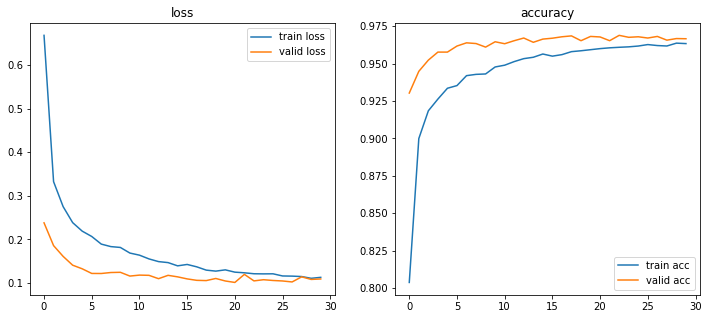

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train loss')
plt.plot(valid_loss, label='valid loss')
plt.title("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train acc')
plt.plot(valid_acc, label='valid acc')
plt.title('accuracy')
plt.legend()

plt.show()
plt.close()

In [24]:
predictions = model.predict(x_test)

In [25]:
pred = np.argmax(predictions, axis=1)

In [26]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [27]:
sub = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sub['Label'] = pred
sub.to_csv('AI 3주차.csv', index=False)